# Randomized complete block design

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RCBD-Analysis" data-toc-modified-id="RCBD-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RCBD Analysis</a></span><ul class="toc-item"><li><span><a href="#Manual-calculations-for-RCBD-analysis" data-toc-modified-id="Manual-calculations-for-RCBD-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Manual calculations for RCBD analysis</a></span></li><li><span><a href="#RCBD-Calculation-from-Statsmodel" data-toc-modified-id="RCBD-Calculation-from-Statsmodel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RCBD Calculation from Statsmodel</a></span></li><li><span><a href="#Visualizing-Interaction-Assumption" data-toc-modified-id="Visualizing-Interaction-Assumption-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing Interaction Assumption</a></span></li><li><span><a href="#Normality-Check-Plotting-function" data-toc-modified-id="Normality-Check-Plotting-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normality Check Plotting function</a></span></li></ul></li><li><span><a href="#Your-Turn----Activity-I:-RCBD-Analysis" data-toc-modified-id="Your-Turn----Activity-I:-RCBD-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Your Turn -- Activity I: RCBD Analysis</a></span></li></ul></div>

In [2]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## RCBD Analysis

In [3]:
df = pd.read_excel('lect04-blocking.xlsx', sheet_name='StrengthData1',header=None)
df

a = df.shape[0]
b = df.shape[1]
strength_data = pd.DataFrame({'Strength': df.stack().values,
                             'ChemType': np.repeat(['C1','C2','C3','C4'],b),
                             'Fabric': ['F1','F2','F3','F4','F5']*a})
strength_data

,0,1,2,3,4
0,1.3,1.6,0.5,1.2,1.1
1,2.2,2.4,0.4,2.0,1.8
2,1.8,1.7,0.6,1.5,1.3
3,3.9,4.4,2.0,4.1,3.4


,Strength,ChemType,Fabric
0,1.3,C1,F1
1,1.6,C1,F2
2,0.5,C1,F3
3,1.2,C1,F4
4,1.1,C1,F5
5,2.2,C2,F1
6,2.4,C2,F2
7,0.4,C2,F3
8,2.0,C2,F4
9,1.8,C2,F5


In [5]:
### Load table and convert to dataframe
df = pd.read_excel('lect04-blocking.xlsx', sheet_name='StrengthData2',header=0)
strength_data = pd.melt(df, id_vars='ChemType', value_vars=df.columns[1:],
                       var_name='Fabric', value_name='Strength')
print(strength_data)

   ChemType Fabric  Strength
0        C1     F1       1.3
1        C2     F1       2.2
2        C3     F1       1.8
3        C4     F1       3.9
4        C1     F2       1.6
5        C2     F2       2.4
6        C3     F2       1.7
7        C4     F2       4.4
8        C1     F3       0.5
9        C2     F3       0.4
10       C3     F3       0.6
11       C4     F3       2.0
12       C1     F4       1.2
13       C2     F4       2.0
14       C3     F4       1.5
15       C4     F4       4.1
16       C1     F5       1.1
17       C2     F5       1.8
18       C3     F5       1.3
19       C4     F5       3.4


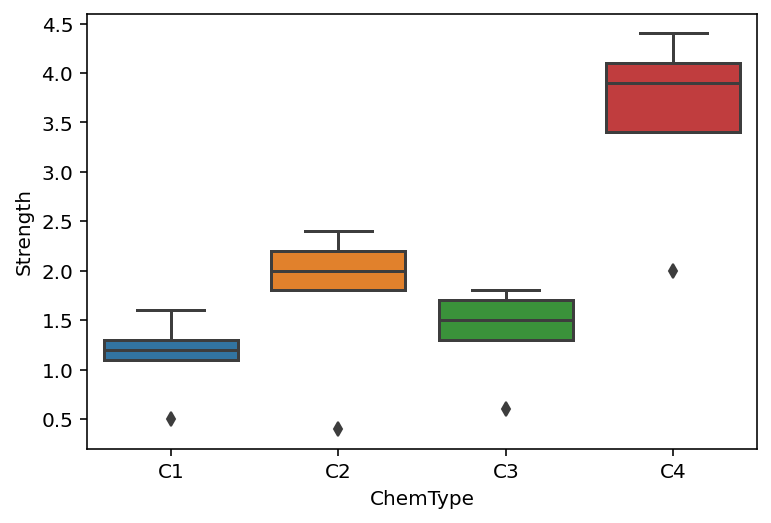

In [6]:
sns.boxplot(x='ChemType',y='Strength',data=strength_data);

### Manual calculations for RCBD analysis

In [7]:
# Compute variables
a = len(strength_data.ChemType.unique())
b = len(strength_data.Fabric.unique())
total_y = sum(strength_data.Strength)
SST = sum(strength_data.Strength**2) - (total_y**2)/(a*b) 

# Compute SS terms
yi_dot = strength_data.groupby('ChemType').aggregate({'Strength':'sum'}).Strength
SSTr = sum(yi_dot**2)/b - (total_y**2)/(a*b)
ydot_j = strength_data.groupby('Fabric').aggregate({'Strength':'sum'}).Strength
SSB = sum(ydot_j**2)/a - (total_y**2)/(a*b)
SSE = SST - SSB - SSTr 
print("SST = {:.3f}, SSTr = {:.3f}, SSB = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSB, SSE))

# Compute MS Terms
MSTr = SSTr/(a-1)
MSB = SSB/(b-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTr/MSE
p_value = stats.f.sf(F0, a-1,(a-1)*(b-1))
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))

SST = 25.688, SSTr = 18.044, SSB = 6.693, SSE = 0.951
MSTr = 6.015, MSE = 0.079, F0 = 75.895, P-value = 0.000


### RCBD Calculation from Statsmodel

In [8]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm

mod = ols('Strength ~ ChemType + Fabric', strength_data).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

            df  sum_sq   mean_sq          F        PR(>F)
ChemType   3.0  18.044  6.014667  75.894848  4.518310e-08
Fabric     4.0   6.693  1.673250  21.113565  2.318913e-05
Residual  12.0   0.951  0.079250        NaN           NaN


### Visualizing Interaction Assumption

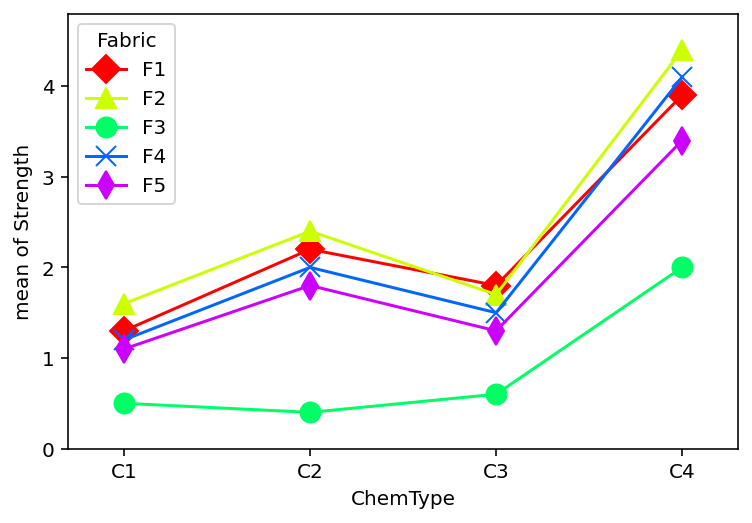

In [9]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(strength_data.ChemType, 
                       strength_data.Fabric, 
                       strength_data.Strength, 
                       markers=['D','^','o','x','d'], ms=10) 

### Normality Check Plotting function

In [10]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()

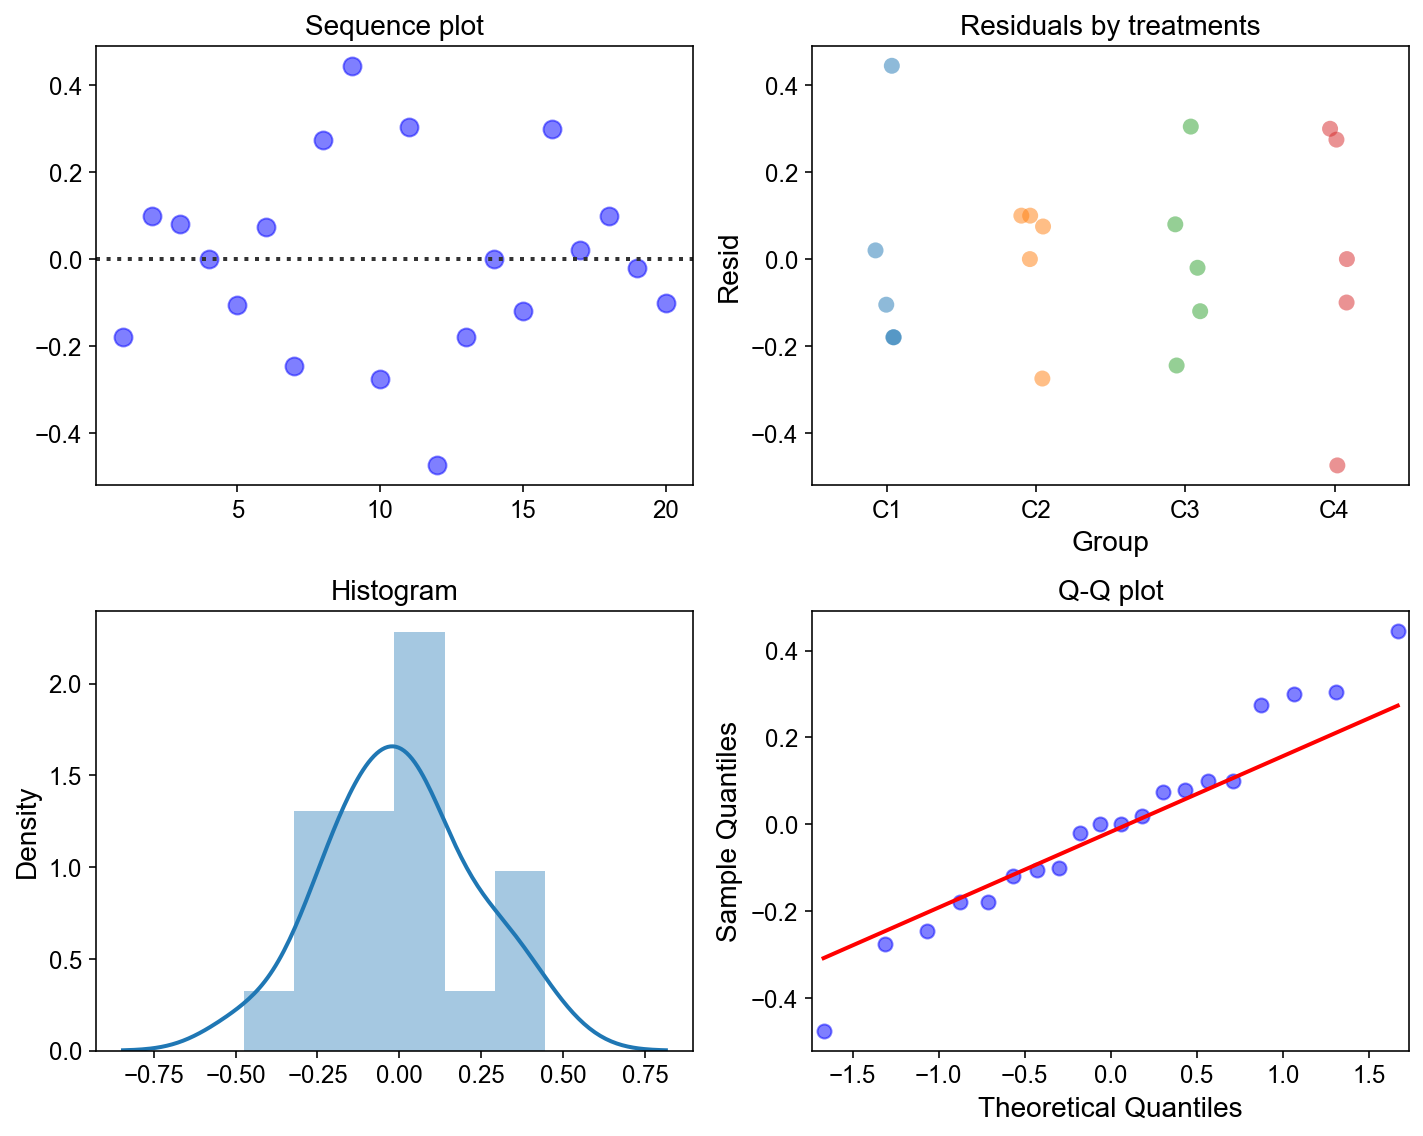

In [9]:
check_anova_normality(strength_data['ChemType'], mod.resid)

**Friedman Test**

In [11]:
from scipy.stats import friedmanchisquare

y1=[1.3, 1.6, 0.5, 1.2, 1.1]
y2=[2.2, 2.4, 0.4, 2.0, 1.8]
y3=[1.8, 1.7, 0.6, 1.5, 1.3]
y4=[3.9, 4.4, 2.0, 4.1, 3.4]

stat, p = friedmanchisquare(y1, y2, y3, y4)
print('Test statistics = {:.2f}, p-value = {:.4f}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('No effect (fail to reject H0)')
else:
  print('Effect observed (reject H0)')

Test statistics = 12.12, p-value = 0.0070
Effect observed (reject H0)


## Your Turn -- Activity I: RCBD Analysis

In [15]:
### Load dataset as dataframe
df = pd.read_excel('lect04-blocking.xlsx', sheet_name='Algorithm Running Time',header=None)
print(df)

a = df.shape[0]
b = df.shape[1]
algor_data = pd.DataFrame({'Algorithm': df.stack().values,
                             'Type': np.repeat(['A1','A2','A3','A4'],b),
                             'DataSet': ['D1','D2','D3','D4','D5', 'D6']*a})
algor_data

      0     1     2     3     4     5
0  90.3  84.2  98.2  93.9  79.4  97.9
1  92.5  89.5  90.6  94.7  86.0  95.8
2  85.5  90.8  89.6  86.2  80.1  93.4
3  82.5  89.5  85.6  87.4  70.9  90.7


,Algorithm,Type,DataSet
0,90.3,A1,D1
1,84.2,A1,D2
2,98.2,A1,D3
3,93.9,A1,D4
4,79.4,A1,D5
5,97.9,A1,D6
6,92.5,A2,D1
7,89.5,A2,D2
8,90.6,A2,D3
9,94.7,A2,D4


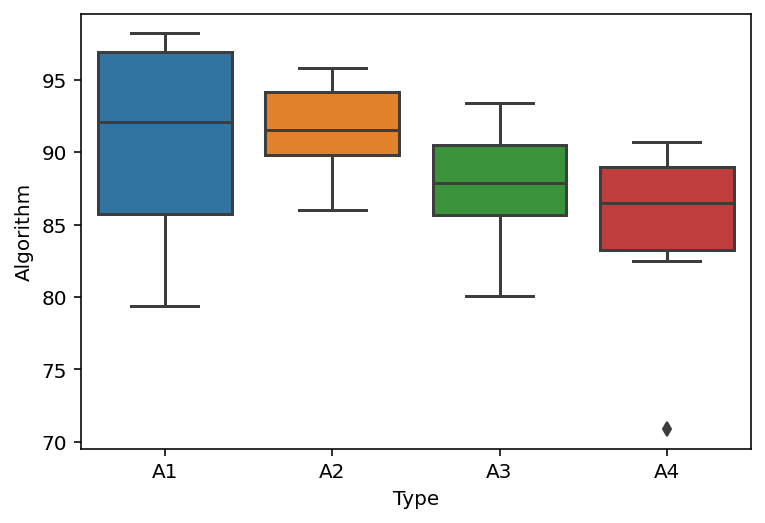

In [16]:
sns.boxplot(x='Type',y='Algorithm',data=algor_data);

**RCBD Analysis**

In [17]:
# Compute variables
a = len(algor_data.Type.unique())
b = len(algor_data.DataSet.unique())
total_y = sum(algor_data.Algorithm)
SST = sum(algor_data.Algorithm**2) - (total_y**2)/(a*b) 

# Compute SS terms
yi_dot = algor_data.groupby('Type').aggregate({'Algorithm':'sum'}).Algorithm
SSTr = sum(yi_dot**2)/b - (total_y**2)/(a*b)
ydot_j = algor_data.groupby('DataSet').aggregate({'Algorithm':'sum'}).Algorithm
SSB = sum(ydot_j**2)/a - (total_y**2)/(a*b)
SSE = SST - SSB - SSTr 
print("SST = {:.3f}, SSTr = {:.3f}, SSB = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSB, SSE))

# Compute MS Terms
MSTr = SSTr/(a-1)
MSB = SSB/(b-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTr/MSE
p_value = stats.f.sf(F0, a-1,(a-1)*(b-1))
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))

SST = 912.060, SSTr = 186.363, SSB = 539.360, SSE = 186.337
MSTr = 62.121, MSE = 12.422, F0 = 5.001, P-value = 0.013


In [18]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm

mod = ols('Algorithm ~ Type + DataSet', algor_data).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

            df      sum_sq     mean_sq         F    PR(>F)
Type       3.0  186.363333   62.121111  5.000716  0.013367
DataSet    5.0  539.360000  107.872000  8.683637  0.000494
Residual  15.0  186.336667   12.422444       NaN       NaN


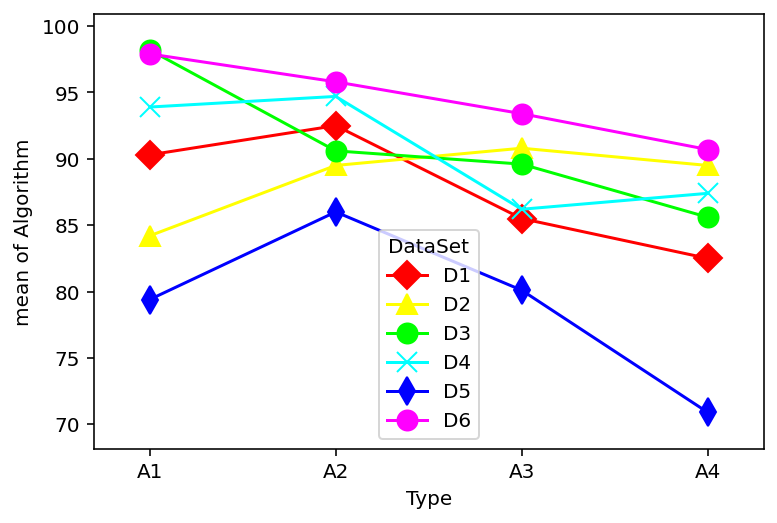

In [22]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(algor_data.Type, 
                       algor_data.DataSet, 
                       algor_data.Algorithm, 
                       markers=['D','^','o','x','d', 'o'], ms=10) 

**CRD Analysis**

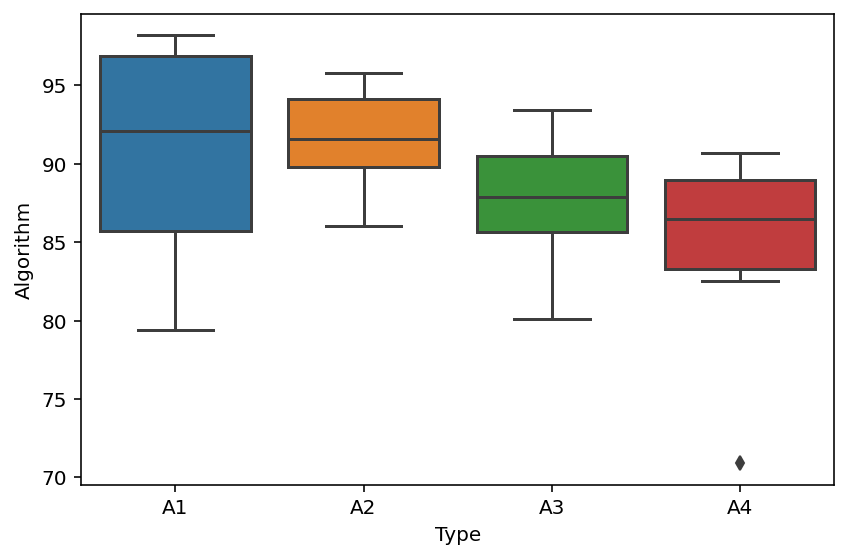

In [23]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Type',y='Algorithm',data=algor_data);
plt.tight_layout()
pass;

In [24]:
### Generate ANOVA table
algor_app_model = ols('Algorithm ~ Type', data=algor_data).fit()
df['resid'] = algor_app_model.resid
aov_table = sm.stats.anova_lm(algor_app_model, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Type,3.0,186.363333,62.121111,1.712041,0.196681
Residual,20.0,725.696667,36.284833,NaN,NaN
